## Plot stats of non-LM, non-boulder events

Note: Codes to run and plot the Schuster spectrum are originally by Thomas Ader, and translated into Python. The original code can be found here: http://www.tectonics.caltech.edu/resources/schuster_spectrum/ 

See:
Ader, T.J. & Avouac, J.-P., 2013. Detecting periodicities and declustering in earthquake catalogs using the Schuster spectrum, application to Himalayan seismicity. Earth and Planetary Science Letters, 377–378, 97–105. doi:10.1016/j.epsl.2013.06.032

### Import libraries

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import os
import glob
import sys
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Import functions
fxndir = '../functions/'
sys.path.insert(0,fxndir)
from moonquake_temperatures import *
from schuster_fxns import *

### Load catalogs of un-categorized isolated and repeating events

In [2]:
mqdir = '../catalogs/final_catalogs/LM_vs_boulder_vs_other/'

# Repeating
cat1_rpt_uncat = pd.read_csv(mqdir + 'A17_repeating_other_catalog_HQ_final.csv')
cat2_rpt_uncat = pd.read_csv(mqdir + 'A17_repeating_other_catalog_HQ_avg_event_stats.csv')

# Isolated
cat1_isol_uncat = pd.read_csv(mqdir + 'A17_isolated_other_catalog_HQ_final.csv')
cat2_isol_uncat = pd.read_csv(mqdir + 'A17_isolated_other_catalog_HQ_avg_event_stats.csv')

### Load temperature cycle

In [3]:
tempdir = '../catalogs/temperature/'
temp_df, int_df = load_temp_cats(tempdir)

# Start and end time of one cycle
starttime_str = int_df.iloc[0]['start times']
starttime = datetime.strptime(int_df.iloc[0]['start times'],'%Y-%m-%d %H:%M:%S')
endtime_str = int_df.iloc[2]['end times']
endtime = datetime.strptime(int_df.iloc[2]['end times'],'%Y-%m-%d %H:%M:%S')

# Times and temperatures 
# One day
temp_df_day = temp_df.loc[(temp_df.Time_YMD >= starttime_str) & (temp_df.Time_YMD <= endtime_str)]
times_day = np.array(temp_df_day.Time_s.tolist())/(3600*24)
rock_temps_day = np.array(temp_df_day.T_rock_K.tolist())
reg_temps_day = np.array(temp_df_day.T_reg_K.tolist())
# Entire timeframe
temp_reg = np.array(temp_df.T_reg_K.tolist())
temp_rock = np.array(temp_df.T_rock_K.tolist())
temp_diff = temp_rock - temp_reg
time_ymd = [datetime.strptime(mqdate, '%Y-%m-%d %H:%M:%S') for mqdate in (temp_df['Time_YMD']).tolist()]

### Load stats

In [4]:
# Time in temperature cycle
int_days_rpt = np.array(cat2_rpt_uncat.avg_interval_day.tolist())
int_days_isol = np.array(cat2_isol_uncat.avg_interval_day.tolist())
int_days = np.concatenate([int_days_rpt,int_days_isol])

# Emergences
emergences_rpt = np.array(cat2_rpt_uncat.avg_emergence_s.tolist())
emergences_isol = np.array(cat2_isol_uncat.avg_emergence_s.tolist())

# Isolated azimuths
# Lag
cat2_isol_az = cat2_isol_uncat.loc[(cat2_isol_uncat.grade_new == 'AA') | (cat2_isol_uncat.grade_new == 'BB')]
cat2_isol_lag = cat2_isol_az
cat2_isol_lag = cat2_isol_az.loc[(cat2_isol_az.theta_sd_lag_deg <= 10) & (cat2_isol_az.theta_sd_lag_deg > 0)]
thetas_lag_isol = np.array(cat2_isol_lag.theta_mean_lag_deg.tolist())
# SNR
cat2_isol_snr = cat2_isol_az
cat2_isol_snr = cat2_isol_az.loc[(cat2_isol_az.theta_sd_snr_deg <= 10) & (cat2_isol_az.theta_sd_snr_deg > 0)]
thetas_snr_isol = np.array(cat2_isol_snr.theta_mean_snr_deg.tolist())

# Repeating
# Lag
cat2_rpt_az = cat2_rpt_uncat.loc[(cat2_rpt_uncat.grade_new == 'AA') | (cat2_rpt_uncat.grade_new == 'BB')]
cat2_rpt_lag = cat2_rpt_az
cat2_rpt_lag = cat2_rpt_az.loc[(cat2_rpt_az.theta_sd_lag_deg <= 10) & (cat2_rpt_az.theta_sd_lag_deg > 0)]
thetas_lag_rpt = np.array(cat2_rpt_lag.theta_mean_lag_deg.tolist())
# SNR
cat2_rpt_snr = cat2_rpt_az
cat2_rpt_snr = cat2_rpt_az.loc[(cat2_rpt_az.theta_sd_snr_deg <= 10) & (cat2_rpt_az.theta_sd_snr_deg > 0)]
thetas_snr_rpt = np.array(cat2_rpt_snr.theta_mean_snr_deg.tolist())

### Bin azimuths

In [5]:
# Bin azimuths from lag
# Isolated
theta_mean_radii_lag_isol = (thetas_lag_isol * np.pi) / 180
counts_lag_isol, histbins_lag_isol = np.histogram(theta_mean_radii_lag_isol)
histbins_lag_isol = histbins_lag_isol[:-1]
# Repeating
theta_mean_radii_lag_rpt = (thetas_lag_rpt * np.pi) / 180
counts_lag_rpt, histbins_lag_rpt = np.histogram(theta_mean_radii_lag_rpt)
histbins_lag_rpt = histbins_lag_rpt[:-1]

# Bin azimuths from SNR pick
# Isolated
theta_mean_radii_snr_isol = (thetas_snr_isol * np.pi) / 180
counts_snr_isol, histbins_snr_isol = np.histogram(theta_mean_radii_snr_isol)
histbins_snr_isol = histbins_snr_isol[:-1]
# Repeating
theta_mean_radii_snr_rpt = (thetas_snr_rpt * np.pi) / 180
counts_snr_rpt, histbins_snr_rpt = np.histogram(theta_mean_radii_snr_rpt)
histbins_snr_rpt = histbins_snr_rpt[:-1]

#### Plot azimuths

Text(0.5, 1.0, 'Other Isolated')

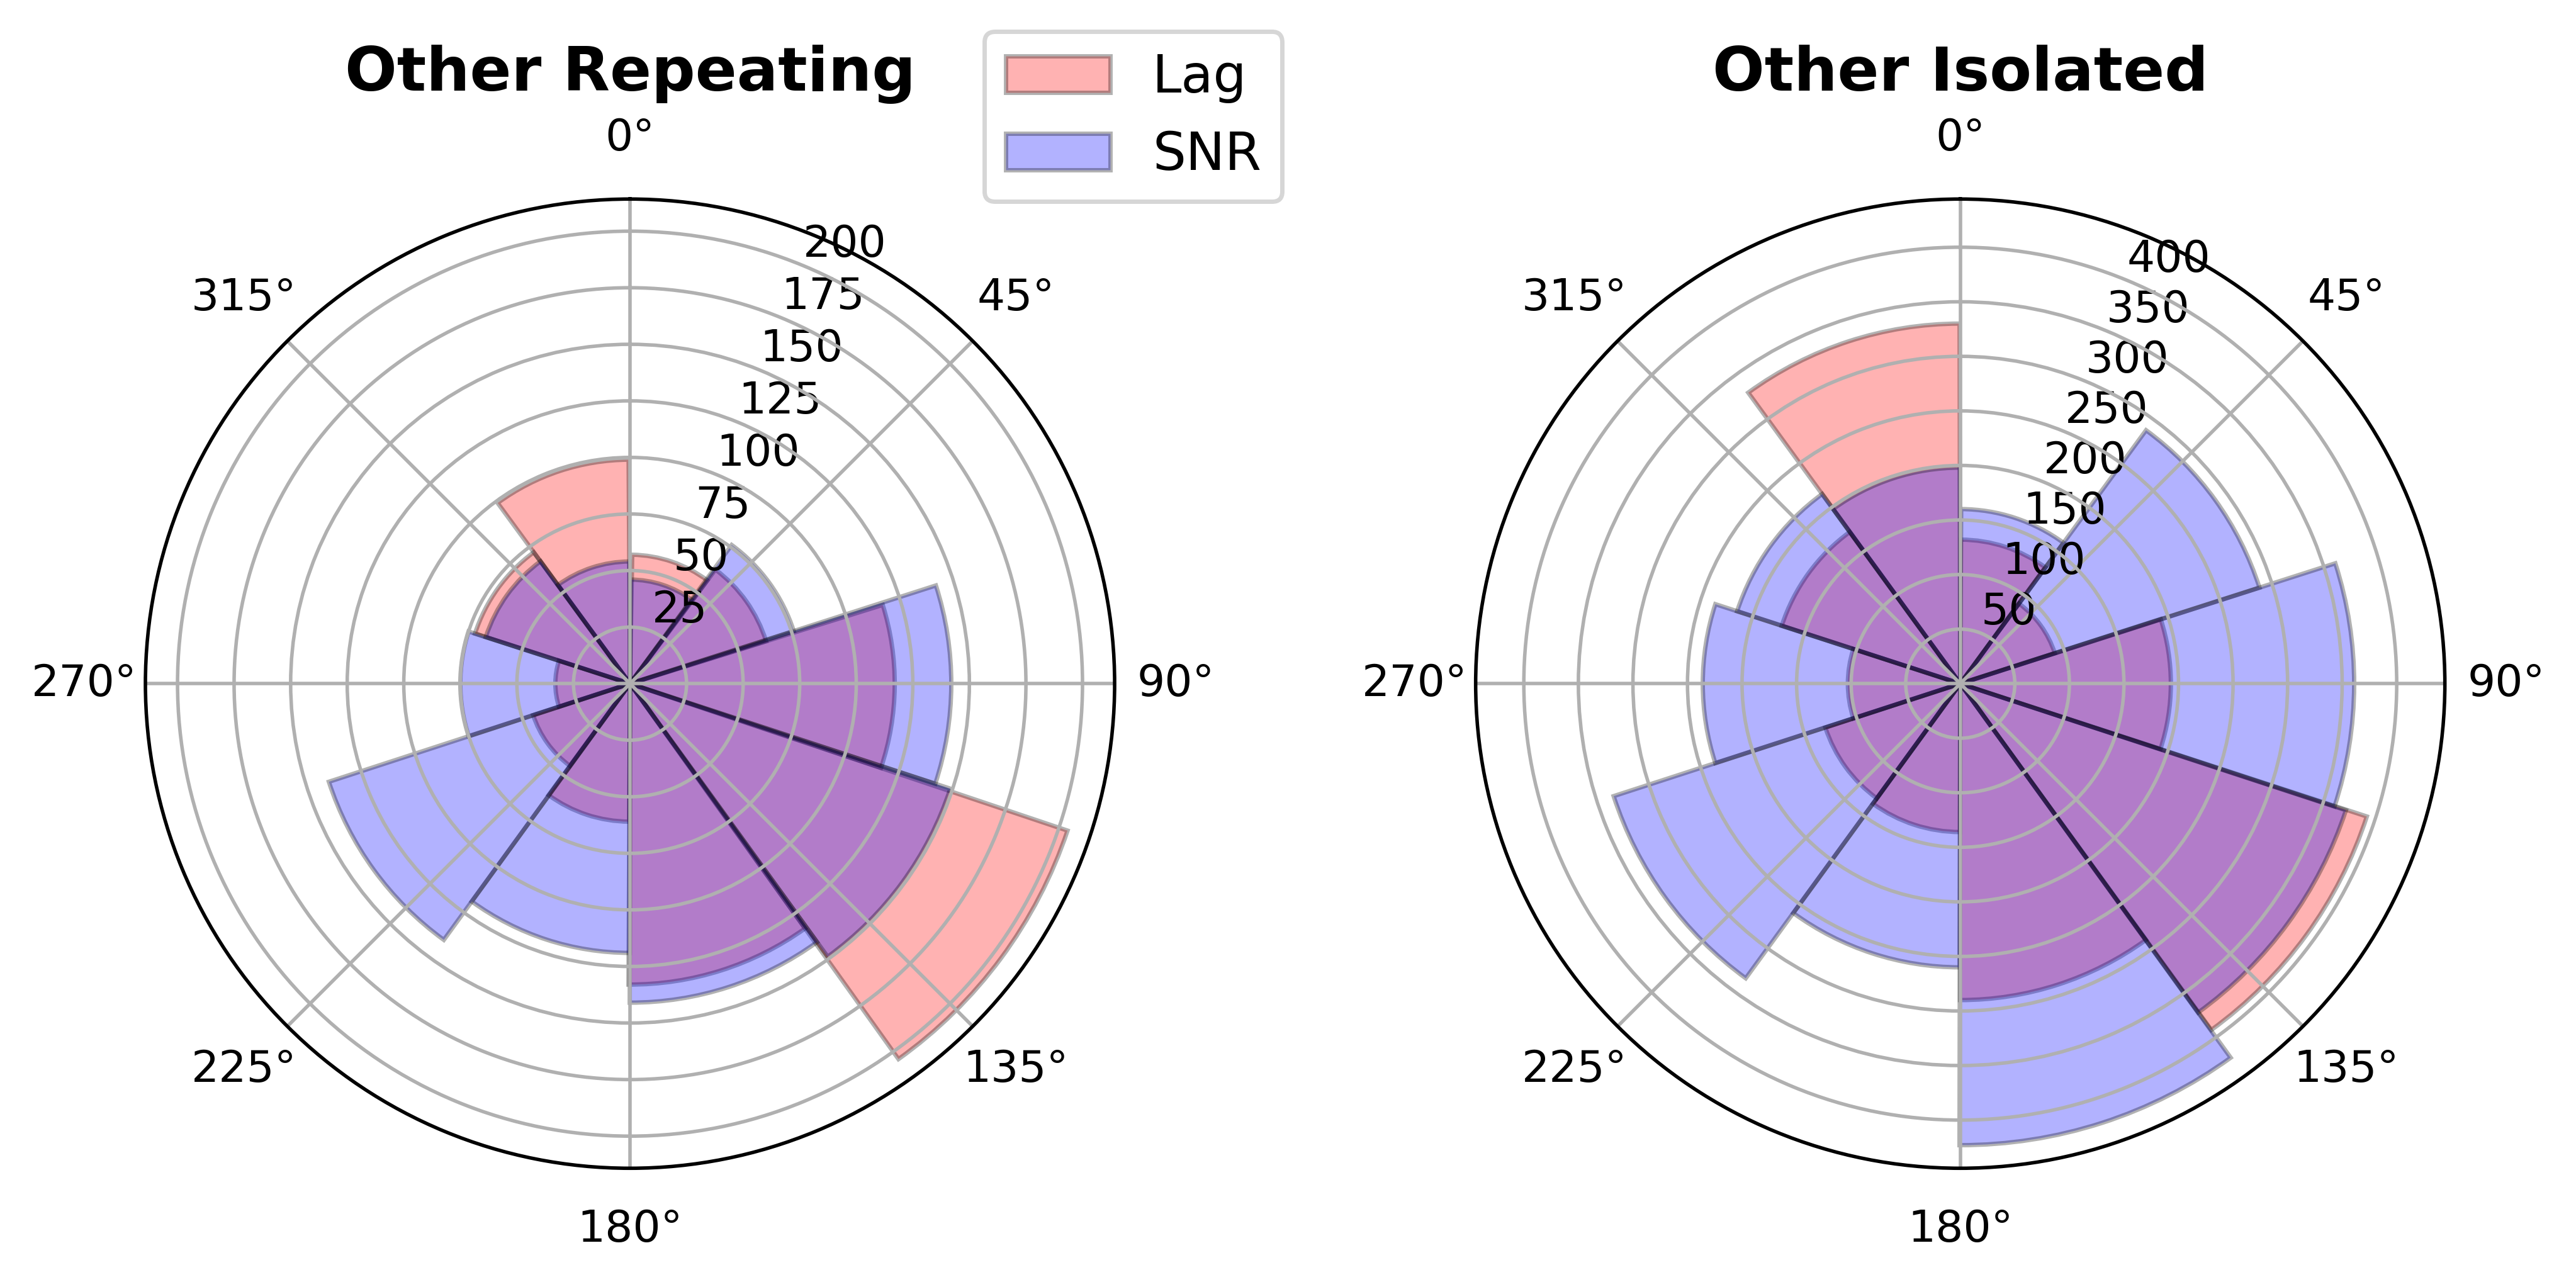

In [16]:
# Initialize figure
fig = plt.figure(figsize=(10., 4.), dpi=500)
gs = gridspec.GridSpec(1, 2) 

# Repeating
ax_rpt = fig.add_subplot(gs[0, 0], projection='polar')
ax_rpt.bar(histbins_lag_rpt, counts_lag_rpt, width = histbins_lag_rpt[1] - histbins_lag_rpt[0], align='edge', color='red', edgecolor='black', alpha=0.3, label='Lag')
ax_rpt.bar(histbins_snr_rpt, counts_snr_rpt, width = histbins_snr_rpt[1] - histbins_snr_rpt[0], align='edge', color='blue', edgecolor='black', alpha=0.3, label='SNR')
ax_rpt.set_theta_zero_location("N")
ax_rpt.set_theta_direction(-1)
ax_rpt.set_title('Other Repeating',fontweight='bold',fontsize=14)
ax_rpt.legend(loc='upper right',bbox_to_anchor=(1.2,1.2),fontsize=12)

# Isolated
ax_isol = fig.add_subplot(gs[0, 1], projection='polar')
ax_isol.bar(histbins_lag_isol, counts_lag_isol, width = histbins_lag_isol[1] - histbins_lag_isol[0], align='edge', color='red', edgecolor='black', alpha=0.3, label='Lag')
ax_isol.bar(histbins_snr_isol, counts_snr_isol, width = histbins_snr_isol[1] - histbins_snr_isol[0], align='edge', color='blue', edgecolor='black', alpha=0.3, label='SNR')
ax_isol.set_theta_zero_location("N")
ax_isol.set_theta_direction(-1)
ax_isol.set_title('Other Isolated',fontweight='bold',fontsize=14)

### Construct Schuster spectra

#### Arrange catalogs in ascending temporal order

In [7]:
# Repeating
cat2_rpt_uncat = cat2_rpt_uncat.sort_values(by=['avg_picktime_SNR'])
cat2_rpt_uncat = cat2_rpt_uncat.reset_index()

# Isolated
cat2_isol_uncat = cat2_isol_uncat.sort_values(by=['avg_picktime_SNR'])
cat2_isol_uncat = cat2_isol_uncat.reset_index()

#### Calculate time of each moonquake in days, relative to the first one

In [8]:
# Repeating
t0row = cat2_rpt_uncat.iloc[0]
t0time = datetime.strptime(t0row.avg_picktime_SNR,'%Y-%m-%d %H:%M:%S.%f')
mqdays_rpt = []
for r in np.arange(0,len(cat2_rpt_uncat)):
    mqrow = cat2_rpt_uncat.iloc[r]
    mqtime = datetime.strptime(mqrow.avg_picktime_SNR,'%Y-%m-%d %H:%M:%S.%f')
    deltat = (mqtime - t0time).total_seconds() / (60*60*24)
    mqdays_rpt.append(deltat)
mqdays_rpt = np.array(mqdays_rpt)

# Isolated
t0row = cat2_isol_uncat.iloc[0]
t0time = datetime.strptime(t0row.avg_picktime_SNR,'%Y-%m-%d %H:%M:%S.%f')
mqdays_isol = []
for r in np.arange(0,len(cat2_isol_uncat)):
    mqrow = cat2_isol_uncat.iloc[r]
    mqtime = datetime.strptime(mqrow.avg_picktime_SNR,'%Y-%m-%d %H:%M:%S.%f')
    deltat = (mqtime - t0time).total_seconds() / (60*60*24)
    mqdays_isol.append(deltat)
mqdays_isol = np.array(mqdays_isol)

#### Calculate Schuster spectra - repeating events

In [9]:
# Vector of periods to test
T_min = 0.1
T_max = 250
T_test = np.arange(T_min,T_max,0.1)
t_span_rpt = np.max(mqdays_rpt)

# Schuster spectrum
log_prob_rpt = Schuster_test_log(mqdays_rpt,T_test)
p_val_rpt = np.exp(log_prob_rpt)

#### Schuster spectrum - isolated events

In [10]:
# Vector of periods to test
T_min = 0.1
T_max = 250
T_test = np.arange(T_min,T_max,0.1)
t_span_isol = np.max(mqdays_isol)

# Schuster spectrum
log_prob_isol = Schuster_test_log(mqdays_isol,T_test)
p_val_isol = np.exp(log_prob_isol)

### Plot Schuster spectra, temperatures, and emergences

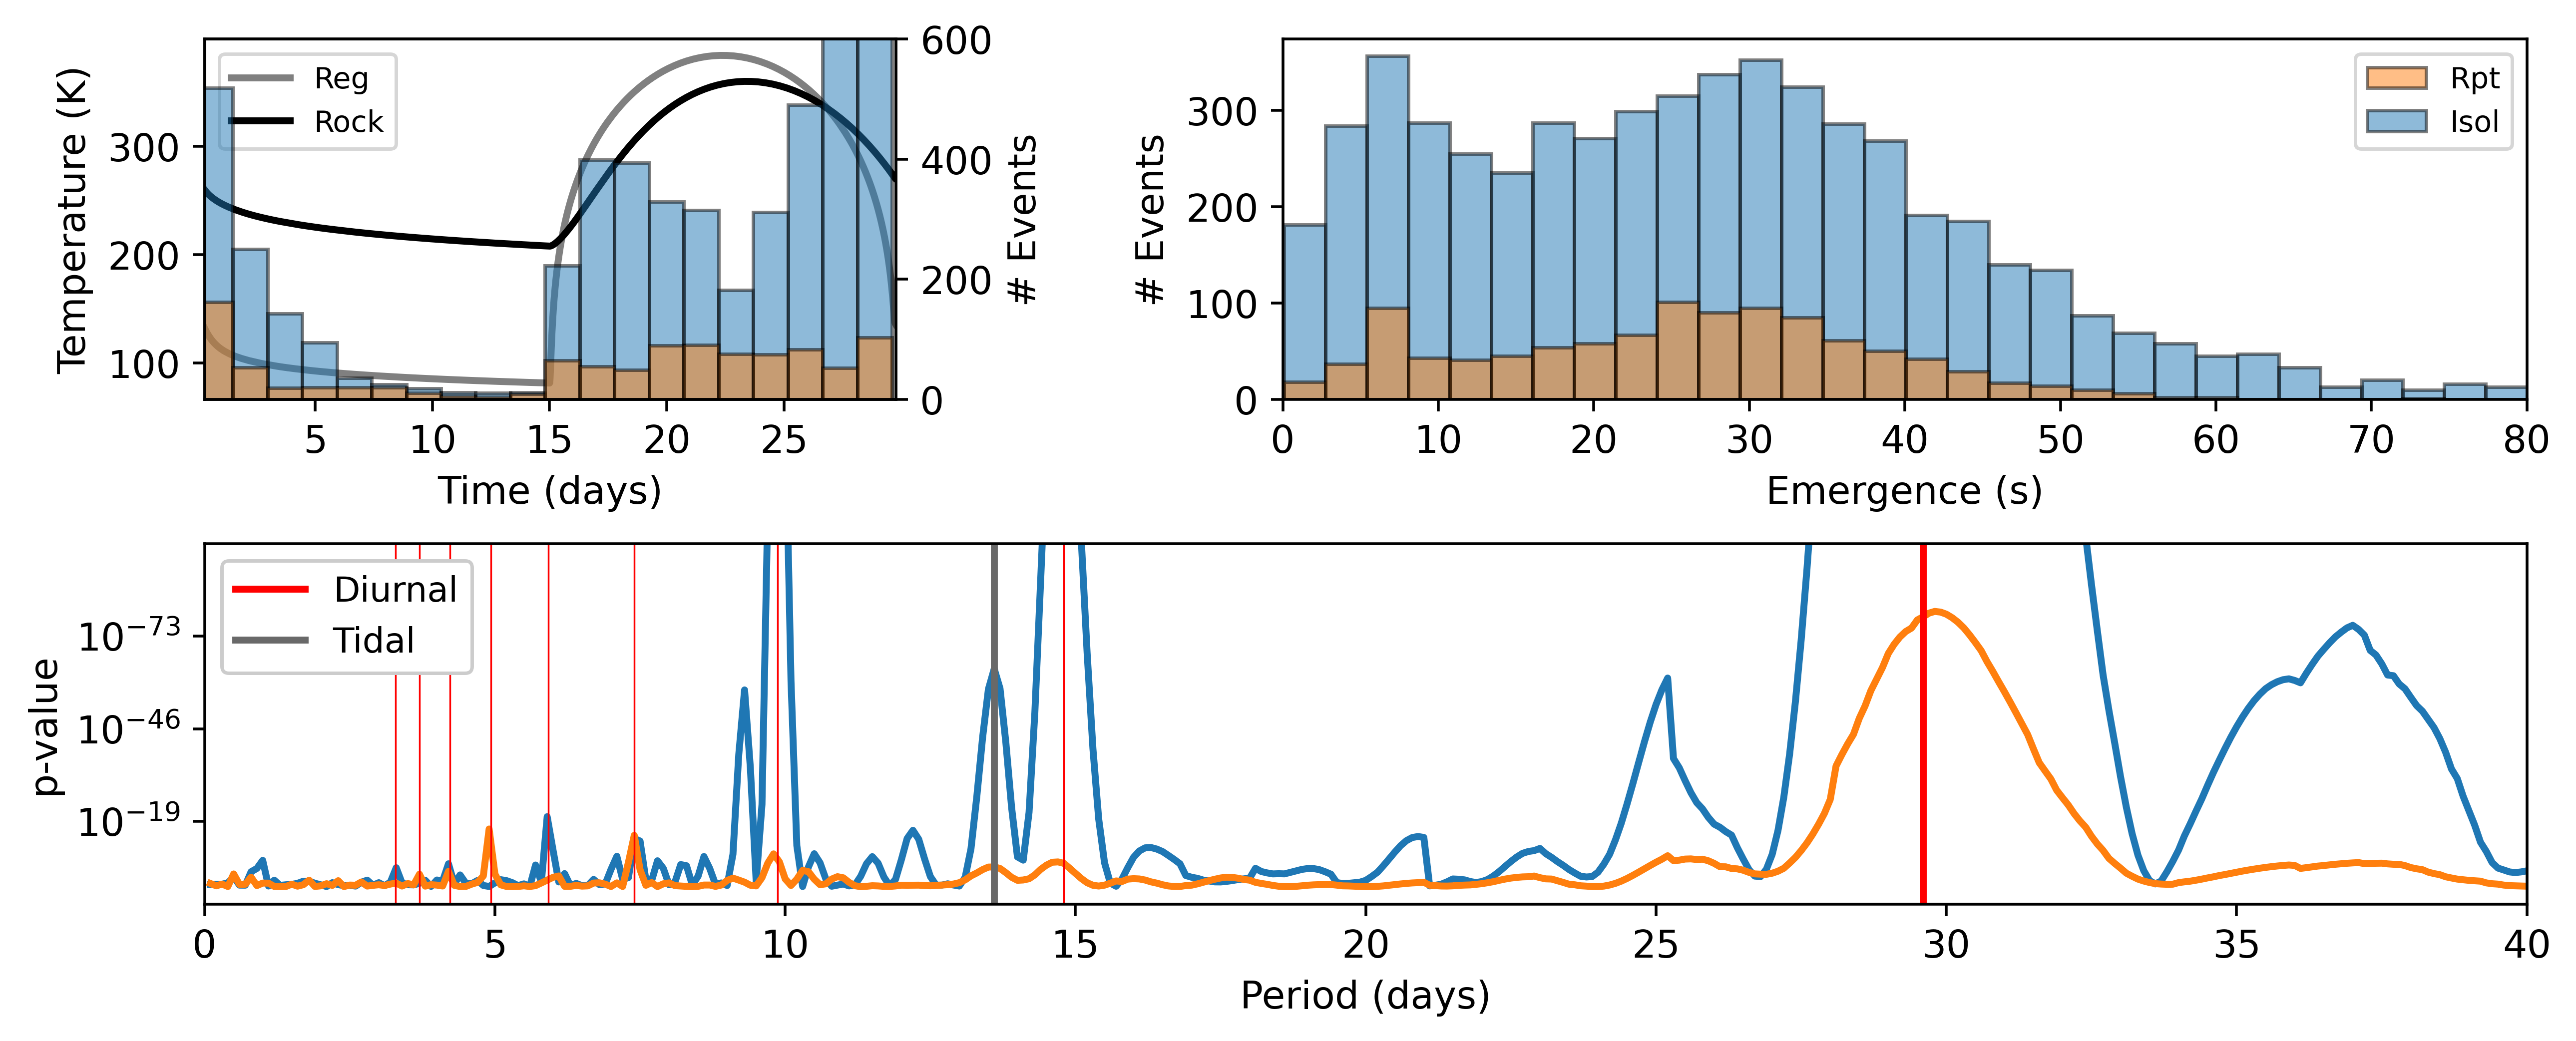

In [14]:
# Initialize figure
fig = plt.figure(figsize=(12., 4.5), dpi=500)
gs = gridspec.GridSpec(2, 2, width_ratios=(1.,1.8)) 

# Temperatures
ax_temp = fig.add_subplot(gs[0, 0])
ax_temp.plot(times_day, reg_temps_day, color='grey', linewidth=2, label='Reg')
ax_temp.plot(times_day, rock_temps_day, color='black', linewidth=2, label='Rock')
ax_temp.legend(loc='best',fontsize=8.5)
ax_temp.set_xlim([min(times_day),max(times_day)])
bins = np.histogram(np.hstack((int_days_isol,int_days_rpt)), bins=20)[1]
ax_temp2 = ax_temp.twinx()
ax_temp2.hist(int_days_isol, color='C0',alpha=0.5, edgecolor='black', bins=bins)
ax_temp2.hist(int_days_rpt, color='C1',alpha=0.5, edgecolor='black', bins=bins)
ax_temp2.set_xlim([min(times_day),max(times_day)])
ax_temp.set_ylabel('Temperature (K)',fontsize=11)
ax_temp.set_xlabel('Time (days)',fontsize=11)
ax_temp.tick_params(axis='both',labelsize=11)
ax_temp2.set_ylabel('# Events',fontsize=11)
ax_temp2.tick_params(axis='both',labelsize=11)
ax_temp2.set_ylim([0, 600])

# Emergences
ax_emerg = fig.add_subplot(gs[0, 1])
bins = np.histogram(np.hstack((emergences_isol,emergences_rpt)), bins=40)[1]
ax_emerg.hist(emergences_isol, color='C0',alpha=0.5, edgecolor='black', bins=bins,label='Isolated')
ax_emerg.hist(emergences_rpt, color='C1',alpha=0.5, edgecolor='black', bins=bins,label='Repeating')
hist1 = ax_emerg.get_children()[0]
hist2 = ax_emerg.get_children()[-11]
ax_emerg.set_xlabel('Emergence (s)',fontsize=11)
ax_emerg.set_ylabel('# Events',fontsize=11)
ax_emerg.tick_params(axis='both',labelsize=11)
ax_emerg.legend([hist2, hist1],['Rpt', 'Isol'],fontsize=8.5,loc='upper right')
ax_emerg.set_xlim([0, 80])

# Schuster
ax_sch = fig.add_subplot(gs[1, :])
ax_sch.plot(T_test,p_val_isol,color='C0',linewidth=2)
ax_sch.plot(T_test,p_val_rpt,color='C1',linewidth=2)
ax_sch.set_yscale('log')
eps_th = 1
ax_sch.axvline(x = 29.6, color='red',linewidth=2,label='Diurnal')
ax_sch.axvline(x = 29.6/2, color='red',linewidth=0.5)
ax_sch.axvline(x = 29.6/3, color='red',linewidth=0.5)
ax_sch.axvline(x = 29.6/4, color='red',linewidth=0.5)
ax_sch.axvline(x = 29.6/5, color='red',linewidth=0.5)
ax_sch.axvline(x = 29.6/6, color='red',linewidth=0.5)
ax_sch.axvline(x = 29.6/7, color='red',linewidth=0.5)
ax_sch.axvline(x = 29.6/8, color='red',linewidth=0.5)
ax_sch.axvline(x = 29.6/9, color='red',linewidth=0.5)
ax_sch.axvline(x = 13.6, color='dimgrey', linewidth=2,label='Tidal')
ax_sch.set_xlim([0,40])
ax_sch.invert_yaxis()
ax_sch.set_ylim([1.1124914428169462e+5, 1.16e-100])
ax_sch.set_xlabel('Period (days)',fontsize=11)
ax_sch.set_ylabel('p-value',fontsize=11)
ax_sch.tick_params(axis='both',labelsize=11)
ax_sch.legend(loc='upper left', framealpha=1)

# 
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)